# Question 2: Predictive Modeling and Scenario Analysis 
**Task**: 
Develop a predictive model to forecast CO2 emissions based on the comprehensive set of 
indicators. Use the model to answer an analytical question: “If a country increases its GDP 
by 10%, what is the expected percentage change in CO2 emissions, assuming all other 
factors remain constant?” 
 
**Instructions**: 
1. Split the data into training and testing sets. 
2. Train a regression model using the socio-economic and environmental indicators as 
predictors. 
3. Evaluate the model's performance using appropriate metrics (e.g., RMSE, R²). 
4. Simulate the scenario where GDP increases by 10% across different countries, keeping 
other factors constant. 
5. Analyze and interpret the results, providing a range of expected changes in CO2 
emissions across nations. 

**How to use**
- You can run all cells.
- Please refer to the deliverables folder and the [q2.md](deliverables/q2.md) file for an overview of implementation and results.

In [1]:
import pandas as pd
from helpers_v2 import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

Key '4095110436489415096' not in persistent cache.
Key '-3862449154251328547' not in persistent cache.
Key '-7643646340887627066' not in persistent cache.
Key '-7389408928338301103' not in persistent cache.
Key '2895947968731355341' not in persistent cache.
Key '6160780070729913647' not in persistent cache.
Key '-8852322536110669262' not in persistent cache.
Key '4095110436489415096' not in persistent cache.
Key '-3862449154251328547' not in persistent cache.
Key '-7643646340887627066' not in persistent cache.
Key '-7389408928338301103' not in persistent cache.
Key '2895947968731355341' not in persistent cache.
Key '6160780070729913647' not in persistent cache.
Key '-8852322536110669262' not in persistent cache.
Key '4095110436489415096' not in persistent cache.
Key '-3862449154251328547' not in persistent cache.
Key '-7643646340887627066' not in persistent cache.
Key '-7389408928338301103' not in persistent cache.
Key '2895947968731355341' not in persistent cache.
Key '616078007072991

In [2]:
df = pd.read_csv('clean_data/wbdata_cleaned.csv')
df.head()

,country,date,Urbanization_rate,Renewable_elec_output,log_CO2_emissions,log_GDP,log_Population,log_Energy_use
0,Australia,2015,85.701,13.637841,12.863031,27.932435,16.985868,8.609739
1,Australia,2014,85.602,14.906712,12.845999,28.015329,16.971476,8.582172
2,Australia,2013,85.502,13.264108,12.869864,28.086737,16.956560,8.606923
3,Australia,2012,85.402,10.592653,12.888389,28.067759,16.939349,8.626278
4,Australia,2011,85.300,10.426652,12.885216,27.966565,16.921890,8.656300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                988 non-null    object 
 1   date                   988 non-null    int64  
 2   Urbanization_rate      988 non-null    float64
 3   Renewable_elec_output  988 non-null    float64
 4   log_CO2_emissions      988 non-null    float64
 5   log_GDP                988 non-null    float64
 6   log_Population         988 non-null    float64
 7   log_Energy_use         988 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.9+ KB


In [4]:
model_evaluation = ModelEvaluation()
# Create test and train sets
X = df.drop(columns=['country', 'date', 'log_CO2_emissions'])
y = df['log_CO2_emissions']

X.head()

,Urbanization_rate,Renewable_elec_output,log_GDP,log_Population,log_Energy_use
0,85.701,13.637841,27.932435,16.985868,8.609739
1,85.602,14.906712,28.015329,16.971476,8.582172
2,85.502,13.264108,28.086737,16.956560,8.606923
3,85.402,10.592653,28.067759,16.939349,8.626278
4,85.300,10.426652,27.966565,16.921890,8.656300


In [5]:
y.head()

0    12.863031
1    12.845999
2    12.869864
3    12.888389
4    12.885216
Name: log_CO2_emissions, dtype: float64

In [6]:
results = []

# Experiments to find best model and other parameters
results.append(model_evaluation.run_q2_regression_experiment(LinearRegression(), X, y, poly_degree=None))
results.append(model_evaluation.run_q2_regression_experiment(LinearRegression(), X, y, poly_degree=2))
results.append(model_evaluation.run_q2_regression_experiment(Lasso(), X, y, poly_degree=None))
results.append(model_evaluation.run_q2_regression_experiment(Ridge(), X, y, poly_degree=None))
results.append(model_evaluation.run_q2_regression_experiment(Lasso(), X, y, poly_degree=2))
results.append(model_evaluation.run_q2_regression_experiment(Ridge(), X, y, poly_degree=2))
results_df = pd.DataFrame(results)
print(results_df)


              Model  Poly Degree  Scaling  Average RMSE  Average R²
0  LinearRegression          NaN     True      0.236811    0.977467
1  LinearRegression          2.0     True      0.193804    0.984789
2             Lasso          NaN     True      1.151752    0.480489
3             Ridge          NaN     True      0.236870    0.977468
4             Lasso          2.0     True      1.108727    0.518562
5             Ridge          2.0     True      0.209601    0.982122


In [7]:
# Training a linear regression model with the best parameter we found
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_polynomial = poly.fit_transform(X_train)
X_test_polynomial = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_polynomial)
X_test_scaled = scaler.transform(X_test_polynomial)


model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Scenario Simulation
X_test_scenario = X_test.copy()

# Increase GDP by 10%
X_test_scenario["log_GDP"] *= 1.10

X_test_scenario_poly = poly.transform(X_test_scenario)
X_test_scenario_scaled = scaler.transform(X_test_scenario_poly)

y_pred_scenario = model.predict(X_test_scenario_scaled)

# Calculate the percentage change in CO2 emissions
percentage_change = ((y_pred_scenario - y_pred) / y_pred) * 100

average_change = np.mean(percentage_change)
print(f"Average percentage change in CO2 emissions: {average_change}%")

RMSE: 0.22507639016845538
R²: 0.9758085102368483
Average percentage change in CO2 emissions: 2.299827607706699%


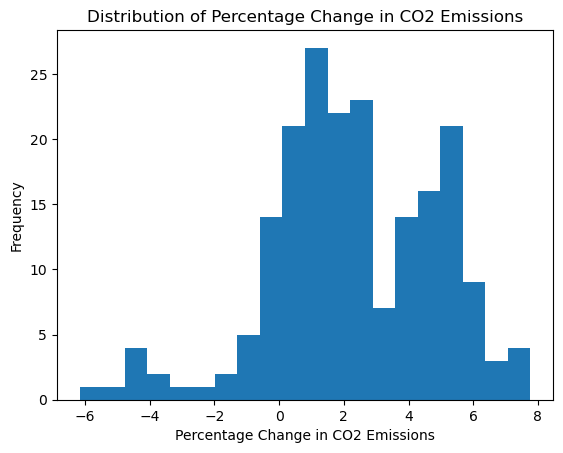

In [8]:
plt.hist(percentage_change, bins=20)
plt.xlabel("Percentage Change in CO2 Emissions")
plt.ylabel("Frequency")
plt.title("Distribution of Percentage Change in CO2 Emissions")
plt.show()